# NAIVE BAYES & ANÁLISIS DE SENTIMIENTO

El csv adjunto incluye reviews que han dejado usuarios en la Google Play Store en referencia a 23 apps, incluyendo una valoración categórica sobre el análisis de sentimiento. Los datos son los siguientes:

- package_name: Nombre de la app
- review: Texto del usuario con la review
- polarity: Sentimiento de polaridad de la review:
    - 1: Review con un sentimiento muy positivo o muy negativo
    - 0: Review con un sentimiento neutro (-->realizo una pequeña corrección, el enunciado ponía '2')

## CARGA DE PACKAGES

El análisis del sentimiento o la minería de opinión es el estudio computacional de opiniones, sentimientos y emociones expresadas a través de un texto. En general, las opiniones pueden centrarse en un producto, un servicio, un individuo, una
organización, un evento o un tema. Utilizamos el término objeto para denotar la entidad de destino que se ha comentado. Un objeto puede además tener un conjunto de componentes (o partes) y un conjunto de atributos o propiedades). Cada
componente puede tener sus propios subcomponentes y su conjunto de atributos, y así sucesivamente.

Se formalizan estos conceptos mediante las siguientes definiciones:

**Objeto**: un objeto o es una entidad que puede ser un producto, persona, evento, organización o tema. En nuestro caso serían las 23 apps de Google Play. Variable: package_name.

**Opinión**: una opinión sobre una característica f es una actitud, emoción o valoración positiva o negativa sobre f. Nuestro Objeto serían las reviews. Variable: review.

**Orientación de una opinión**: la orientación de una opinión sobre una característica f indica si la opinión es positiva, negativa o neutral. Variable: polarity. En este caso se analiza si una review es muy positiva/negativa o neutral.

**Modelo**: Naive Bayes para detección de sentimiento.Este algoritmo de clasificación se basa en el Teorema de Bayes de probabilidad condicional, además supone la independencia entre las variables predictoras. Ya que en muchos casos esta independencia no es real, se lo denomina ‘Naïve’ o ‘Ingenuo’. La clasificación que realiza este método está dada por la probabilidad de que una observación pertenezca a una clase, dadas las probabilidades de sus variables predictoras. Es la técnica más utilizada como base de comparación.

**Data**: En este ejemplo utilizaremos el dataset: **sentiment_dataset.csv** con el cual crearemos el modelo y lo validaremos.

**Objetivo:** Vamos a crear un modelo que nos permita identificar el sentimiento/polaridad de una review en base a los comentarios ya recolectados en el dataset, indicando si son muy negativos/positivos o neutrales.

$${P(Polaridad|Reviews)} =  P(Reviews|Polaridad) * P(Polaridad) / P(Reviews) $$

- Variable dependiente (target) **polarity** (nos indica si el review es positivo/negativo o neutro)
- Variables explicativas o predictoras:

    - **review**

In [223]:
install.packages("openNLPdata")
install.packages("pastecs")
library(pastecs) #>> las funciones: str,stat.desc, table,plot,...
install.packages("modeest")
library(modeest) #>> calcular la moda
install.packages("vcd")
library(vcd)#necesario para ggplo2
library(dplyr) #>> manipulación de datasets: group_by(), summarize()
library(scales) #útil para graficación
install.packages("agricolae")
library(agricolae)  #>> crear tablas de frecuencias agrupadas


install.packages('qdap')
install.packages('slam')
install.packages('tm')
install.packages('SnowballC')
install.packages('gmodels')
install.packages('wordcloud')
install.packages("e1071")
library(e1071)
library(caret)
library(tm)
library(SnowballC)
library(wordcloud)
library(gmodels)
library(wordcloud)
library(qdap)

also installing the dependency ‘rJava’


Warning message in install.packages("openNLPdata"):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("openNLPdata"):
“installation of package ‘openNLPdata’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

also installing the dependencies ‘openNLPdata’, ‘rJava’, ‘openNLP’, ‘venneuler’


Warning message in install.packages("qdap"):
“installation of package ‘rJava’ had non-zero exit status”
Warning message in install.packages("qdap"):
“installation of package ‘openNLPdata’ had non-zero exit status”
Warning message in install.pac

ERROR: Error in library(qdap): there is no package called ‘qdap’


In [230]:
df_sentiment <- read.csv(file='sentiment_dataset.csv', header=TRUE, sep=',')
df_sentiment$polarity<-as.character(df_sentiment$polarity)

head(df_sentiment)#de forma predefinida retorna las primeras 6 observations
tail(df_sentiment)#de forma predefinida retorna las últimas 6 observations
df_sentiment[1,]#si queremos mostrar solo una fila concreta

,package_name,review,polarity
,<chr>,<chr>,<chr>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",0
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,0
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,0
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",0
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",0


,package_name,review,polarity
,<chr>,<chr>,<chr>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,1
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,1
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,1
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",0
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",1
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect,1


,package_name,review,polarity
,<chr>,<chr>,<chr>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,0


Se cambian las variables int por char para su mejor interpretación, Naive Bayes funciona con factores.

In [231]:
df_sentiment$polarity <- ifelse(df_sentiment$polarity == '0', "Neutral", "NegativePositive")
head(df_sentiment)#de forma predefinida retorna las primeras 6 observations
tail(df_sentiment)#de forma predefinida retorna las últimas 6 observations

,package_name,review,polarity
,<chr>,<chr>,<chr>
1,com.facebook.katana,privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online.,Neutral
2,com.facebook.katana,"messenger issues ever since the last update, initial received messages don't get pushed to the messenger app and you don't get notification in the facebook app or messenger app. you open the facebook app and happen to see you have a message. you have to click the icon and it opens messenger. subsequent messages go through messenger app, unless you close the chat head... then you start over with no notification and having to go through the facebook app.",Neutral
3,com.facebook.katana,profile any time my wife or anybody has more than one post and i view them it would take me to there profile so that i can view them all at once. now when i try to view them it tells me that the page that i requested is not available. i've restarted my phone i even cleard the cache and i've uninstalled and reinstalled the app and it is still doing it. please fix it thank you,Neutral
4,com.facebook.katana,the new features suck for those of us who don't have a working back button can you guys make the videos able to be slid to the left to exit the video. as i have to force close facebook to exit,Neutral
5,com.facebook.katana,"forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo from my phone. when i press on the button to select photos the app automatically goes back to the main page. on other occasions, i could enter to my gallery to select my image but as soon as i selected an image and press done, the program, again, forced reload and suddenly go back to the main page. please fix this and i will change my rating. thank you.",Neutral
6,com.facebook.katana,"idk i can't edit my posts? things such as my profile picture, when i edit it, it becomes grey and says that it is no longer available. please fix. i have an htc desire. will rate 5 stars shown fixed đ",Neutral


,package_name,review,polarity
,<chr>,<chr>,<chr>
886,com.rovio.angrybirds,too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance.,NegativePositive
887,com.rovio.angrybirds,loved it i loooooooooooooovvved it because it is incredible awesome and it's in go power and make a new clash of clans the same thing butt better,NegativePositive
888,com.rovio.angrybirds,all time legendary game the birthday party levels and short fuse levels are fantastic.especially when the pigs crash onto different chemicals is just great.suggestion to all those players who cringe about too much ads is close ur wi-fi connection and then play the game.then the ads won't trouble you.,NegativePositive
889,com.rovio.angrybirds,"ads are way to heavy listen to the bad reviews. there are ads after every round, whether you pass it or fail it. sometimes there are ads before the next round starts to. you spend more time on ads than game play. i develop web apps, and honestly many people rely on ads to make a living. i can appreciate that all to well. however, these developers have went far beyond that. frankly, they are disrespectful nitwits.",Neutral
890,com.rovio.angrybirds,"fun works perfectly well. ads aren't as annoying as you think, especially for a free game.",NegativePositive
891,com.rovio.angrybirds,they're everywhere i see angry birds everywhere because i can't stop playing this game. get out my head devs! 4 đ because nothing's perfect,NegativePositive


## <font color='#3d59c6'>  EXPLORACIÓN </font>

In [232]:
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(df_sentiment) 

'data.frame':	891 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : chr  "Neutral" "Neutral" "Neutral" "Neutral" ...


Nos indica que nuestro "objeto" es un dataframe, tenemos 891 observaciones y 3 variables.

In [233]:
#Una manera más rápida y compacta de obtener todos los estadísticos sería a través de la función summary
summary(df_sentiment)

 package_name          review            polarity        
 Length:891         Length:891         Length:891        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

In [234]:
#función para saber si existen NA dentro de nuestro dataset
sum(is.na(df_sentiment))

[1] 0

No hay valores nulos.

In [235]:
# Proporción de clases
round(prop.table(table(df_sentiment$polarity))*100, digits = 1)


NegativePositive          Neutral 
            34.5             65.5 

In [236]:
# Establecemos el tipo de dato a factor
df_sentiment$polarity = factor(df_sentiment$polarity)
df_sentiment$polarity

[1] Neutral          Neutral          Neutral          Neutral         
  [5] Neutral          Neutral          Neutral          Neutral         
  [9] Neutral          Neutral          Neutral          Neutral         
 [13] Neutral          Neutral          Neutral          Neutral         
 [17] Neutral          Neutral          Neutral          Neutral         
 [21] Neutral          Neutral          Neutral          Neutral         
 [25] Neutral          Neutral          Neutral          Neutral         
 [29] Neutral          Neutral          Neutral          Neutral         
 [33] Neutral          Neutral          Neutral          Neutral         
 [37] Neutral          Neutral          Neutral          Neutral         
 [41] Neutral          Neutral          Neutral          Neutral         
 [45] Neutral          Neutral          Neutral          Neutral         
 [49] Neutral          Neutral          Neutral          Neutral         
 [53] Neutral          Neutral          Neutral          Neutral         
 [57] Neutral          Neutral          Neutral          Neutral         
 [61] Neutral          Neutral          Neutral          Neutral         
 [65] Neutral          Neutral          Neutral          Neutral         
 [69] Neutral          Neutral          Neutral          Neutral         
 [73] Neutral          NegativePositive Neutral          Neutral         
 [77] Neutral          Neutral          Neutral          Neutral         
 [81] Neutral          Neutral          Neutral          Neutral         
 [85] Neutral          Neutral          Neutral          Neutral         
 [89] Neutral          Neutral          Neutral          Neutral         
 [93] Neutral          Neutral          Neutral          Neutral         
 [97] Neutral          Neutral          Neutral          Neutral         
[101] Neutral          Neutral          Neutral          Neutral         
[105] Neutral          NegativePositive Neutral          Neutral         
[109] Neutral          Neutral          Neutral          Neutral         
[113] Neutral          NegativePositive Neutral          Neutral         
[117] Neutral          Neutral          Neutral          Neutral         
[121] Neutral          Neutral          Neutral          Neutral         
[125] Neutral          NegativePositive Neutral          Neutral         
[129] NegativePositive Neutral          Neutral          Neutral         
[133] Neutral          Neutral          Neutral          NegativePositive
[137] Neutral          Neutral          Neutral          Neutral         
[141] Neutral          Neutral          NegativePositive Neutral         
[145] Neutral          NegativePositive Neutral          NegativePositive
[149] Neutral          Neutral          Neutral          NegativePositive
[153] Neutral          Neutral          Neutral          Neutral         
[157] Neutral          Neutral          Neutral          Neutral         
[161] NegativePositive NegativePositive NegativePositive Neutral         
[165] Neutral          Neutral          Neutral          Neutral         
[169] Neutral          NegativePositive NegativePositive NegativePositive
[173] NegativePositive NegativePositive Neutral          NegativePositive
[177] NegativePositive Neutral          NegativePositive Neutral         
[181] Neutral          Neutral          NegativePositive Neutral         
[185] NegativePositive NegativePositive Neutral          Neutral         
[189] NegativePositive NegativePositive Neutral          Neutral         
[193] Neutral          Neutral          NegativePositive NegativePositive
[197] Neutral          Neutral          Neutral          Neutral         
[201] Neutral          Neutral          Neutral          Neutral         
[205] Neutral          Neutral          Neutral          Neutral         
[209] Neutral          Neutral          Neutral          Neutral         
[213] Neutral          Neutral          Neutral          Neutral         
[217] 

## <font color='#3d59c6'>  TRANSFORMACIÓN Y LIMPIEZA DEL DATASET </font>

Cabe mencionar que la tarea de clasificación de sentimientos es difícil incluso para los humanos, en donde a veces no es posible llegar a un acuerdo respecto a la polaridad del reviews. Además los textos en reviews están sujetos a errores de ortografía, abreviaciones, modismos y humor o sarcasmo. Utilizamos los siguientes métodos para preprocesar los reviews:


In [237]:
df_corpus = VCorpus(VectorSource(df_sentiment$review),readerControl = list(language = 'en'))
print(df_corpus)

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 891


VCorpus crea un corpus en memoria, hay que pasarle el ‘origen’ o ‘fuente’ (source) de los documentos que formarán la colección, en este caso el dataset sentiment. Tenemos 891 documents creados.

La transformación del texto se realiza utilizando la función tm_map() que nos va a permitir eliminar signos, acentos, espacios,...

In [238]:
# Esta transformación cambia todas las mayúsculas a minúsculas
data_corpus_clean = tm_map(df_corpus, content_transformer(tolower))

# stripWhitespace(): Quita espacios extra (paquete tm)
data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)

# Esta transformación retira números y palabras conectoras de lenguaje y a texto plano
data_corpus_clean = tm_map(data_corpus_clean, removeNumbers) 
data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords("english"))

# removePunctuation(): Elimina puntuación (paquete tm)
data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)

# sustituye puntuaciones por espacios
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}

data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)

# remueve acentos, aunque en inglés no hay, pero lo utilizaremos igual
removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)
data_corpus_clean = tm_map(data_corpus_clean, removeAccents)

#Create plain text document
data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)   

# Visualización de la instancia antes y después de la transformación
print(lapply(df_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy  least put  option appear offline  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone     wanna   facebook   read   newsfeed  just wanna response  message  want  pls reconsidered  review  tried  turn  chat  still can see   online"



Creo función para todas las instrucciones utilizadas para limpieza de reviews:

In [239]:
replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
clean_corpus = function(corpus){
                data_corpus_clean = tm_map(df_corpus, content_transformer(tolower))
                data_corpus_clean = tm_map(data_corpus_clean, stripWhitespace)
                data_corpus_clean = tm_map(data_corpus_clean, removeNumbers) 
                data_corpus_clean = tm_map(data_corpus_clean, removeWords, stopwords("english"))
                data_corpus_clean = tm_map(data_corpus_clean, removePunctuation)
                replacePunctuation = function(x) {gsub('[[:punct:]]', ' ', x)}
                data_corpus_clean = tm_map(data_corpus_clean, replacePunctuation)
                removeAccents = function(x) chartr('àáèéìíòóùú', 'aaeeiioouu', x)
                data_corpus_clean = tm_map(data_corpus_clean, removeAccents)
                data_corpus_clean = tm_map(data_corpus_clean, PlainTextDocument)  
                data_corpus_clean = tm_map(corpus, removeWords, c(stopwords("en"), "shall"
                                          ,"will", "let","thou", "thy", "shall", "thee", "will", "o", "just", "please", "can", "get", "one", "even"))
 
  return(data_corpus_clean)
}

In [240]:
data_corpus = VCorpus(VectorSource(df_sentiment$review),readerControl = list(language = 'en'))
data_corpus_clean = clean_corpus(data_corpus) 
print(lapply(df_corpus[[1]][1], as.character))
print(lapply(data_corpus_clean[[1]][1], as.character))

$content
[1] " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen online like you need to response on every message or else you be called seenzone only. if only i wanna do on facebook is to read on my newsfeed and just wanna response on message i want to. pls reconsidered my review. i tried to turn off chat but still can see me as online."

$content
[1] " privacy  least put  option appear offline.  mean   people like    big pressure   seen online like  need  response  every message  else   called seenzone .    wanna   facebook   read   newsfeed   wanna response  message  want . pls reconsidered  review.  tried  turn  chat  still  see   online."



El paquete wordcloud es la forma más clásica de generar una nube de palabras, a continuación nube de palabras de todo el dataset:

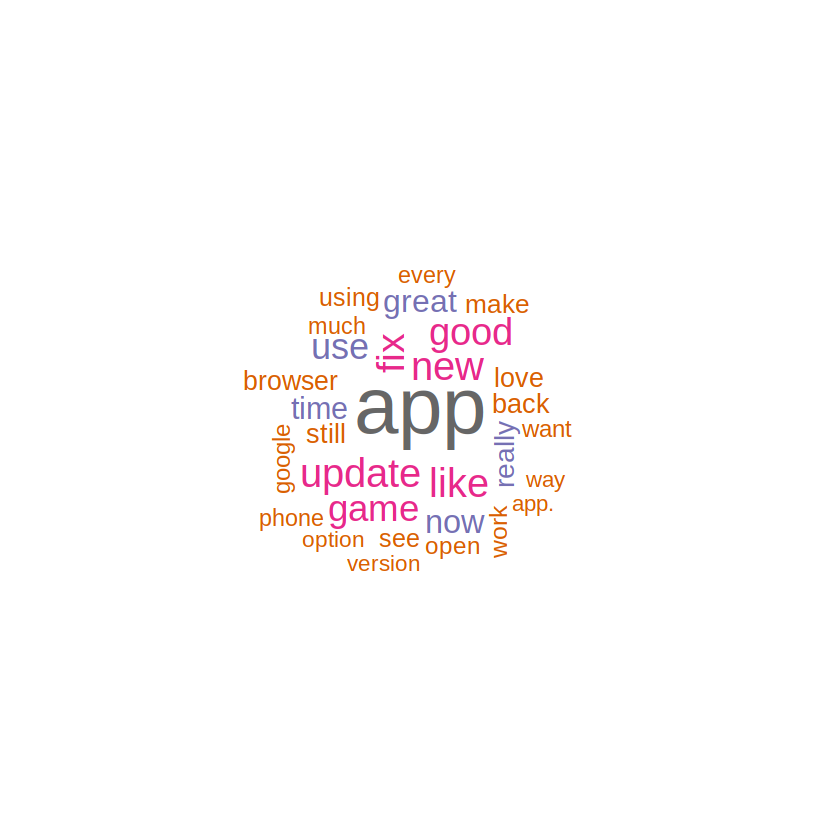

In [241]:
wordcloud(data_corpus_clean, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Nube de palabras para polarización = 1, review muy positiva o muy negativa.

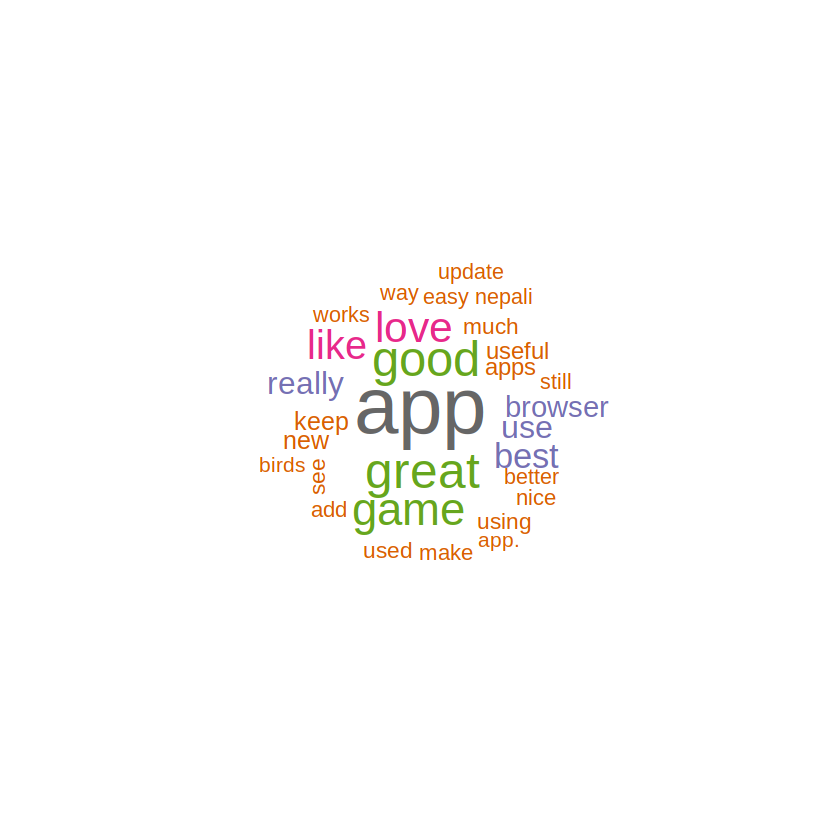

In [242]:
df_sentiment_one = subset(df_sentiment, df_sentiment$polarity == 'NegativePositive')
data_corpus_one = VCorpus(VectorSource(df_sentiment_one$review),readerControl = list(language = 'en'))
data_corpus_clean_one = clean_corpus(data_corpus_one) 

wordcloud(data_corpus_clean_one, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

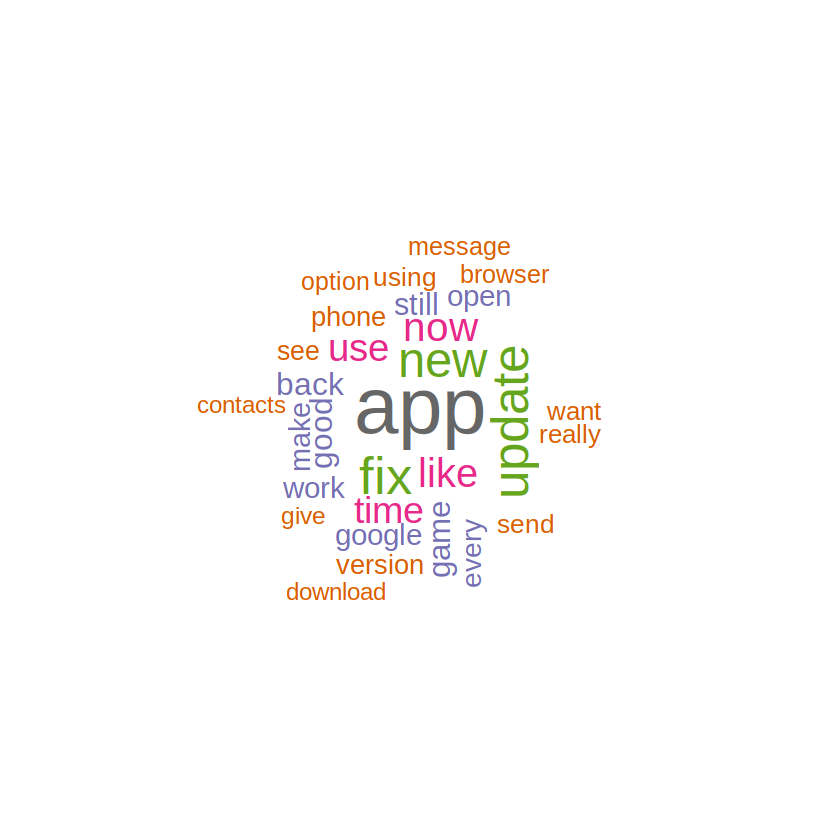

In [243]:
df_sentiment_zero = subset(df_sentiment, df_sentiment$polarity == 'Neutral')
data_corpus_zero = VCorpus(VectorSource(df_sentiment_zero$review),readerControl = list(language = 'en'))
data_corpus_clean_zero = clean_corpus(data_corpus_zero) 

wordcloud(data_corpus_clean_zero, max.words = 30, random.order = F, colors = brewer.pal(name = "Dark2", n = 8))

Lo que se puede observar a simple vista es que las palabras app, game, browser, entre otras se repiten tanto en polaridad positiva/negativa y neutra. Las que difieren son: great, love, good, best, useful, like, denotando palabras de emociones positivas para polaririty = PositiveNegative. Mientras que para polarity = Neutral, se ven palabras como fix, new, update, time, entre otras denotando neutralidad.

## <font color='#3d59c6'>  SEPARACIÓN TRAIN & TEST </font>

Vamos a obtener la frecuencia con la que aparecen los términos en la colección de documentos que tenemos, para ellos seguiremos los siguientes pasos:

Creamos una matriz de términos por documentos con TermDocumentMatrix() de tm.

La transformamos en matriz as.matrix.

Sumamos por filas para obtener el número de veces que aparece cada término.

Creamos una matriz de términos por documento, (Term-Document Matrix).

In [244]:
dtm = DocumentTermMatrix(data_corpus_clean)
dtm

<<DocumentTermMatrix (documents: 891, terms: 5598)>>
Non-/sparse entries: 17443/4970375
Sparsity           : 100%
Maximal term length: 62
Weighting          : term frequency (tf)

In [245]:
termFreq = colSums(as.matrix(dtm))
head(termFreq)
tabla_frec = data.frame(term = names(termFreq), freq = termFreq)
tabla_frec = tabla_frec[order(-tabla_frec[,2]),]
head(tabla_frec)

_(underscore)   --mrsgwennd           -1.         -505)      -edit-2: 
            1             1             1             1             1 
       -edit: 
            1

,term,freq
,<chr>,<dbl>
app,app,317
new,new,136
update,update,136
like,like,135
fix,fix,133
good,good,128


In [246]:
#Create a Term Document Matrix
polarity_tdm <- TermDocumentMatrix(data_corpus_clean)
inspect (polarity_tdm)

<<TermDocumentMatrix (terms: 5598, documents: 891)>>
Non-/sparse entries: 17443/4970375
Sparsity           : 100%
Maximal term length: 62
Weighting          : term frequency (tf)
Sample             :
        Docs
Terms    527 531 591 603 607 631 707 79 791 873
  app      1   0   0   1   1   0   0  1   2   1
  fix      0   0   0   0   0   1   1  0   2   0
  game     0   0   0   0   0   0   0  0   0   6
  good     0   0   0   0   1   0   1  0   0   1
  great    0   0   0   0   1   0   0  0   0   0
  like     0   0   1   0   1   1   0  0   0   0
  new      1   0   0   0   0   0   0  0   1   0
  now      0   0   0   0   0   1   1  0   0   0
  update   0   0   0   0   0   0   1  0   0   0
  use      0   0   1   1   2   0   0  2   0   0


Vemos algunos datos sobre la naturaleza de nuestro texto, número de términos, sparsity (espaciamiento o dispersión de los datos, nos describe en qué grado hay términos que se repiten entre documentos), término más largo, etc, también vemos una previsualización de la matriz, que nos representa la frecuencia de aparición de un término por cada documento.

Ya tenemos el texto preparado para crear visualizaciones que nos ayuden a obtener conclusiones, crearemos otra nube de palabras.

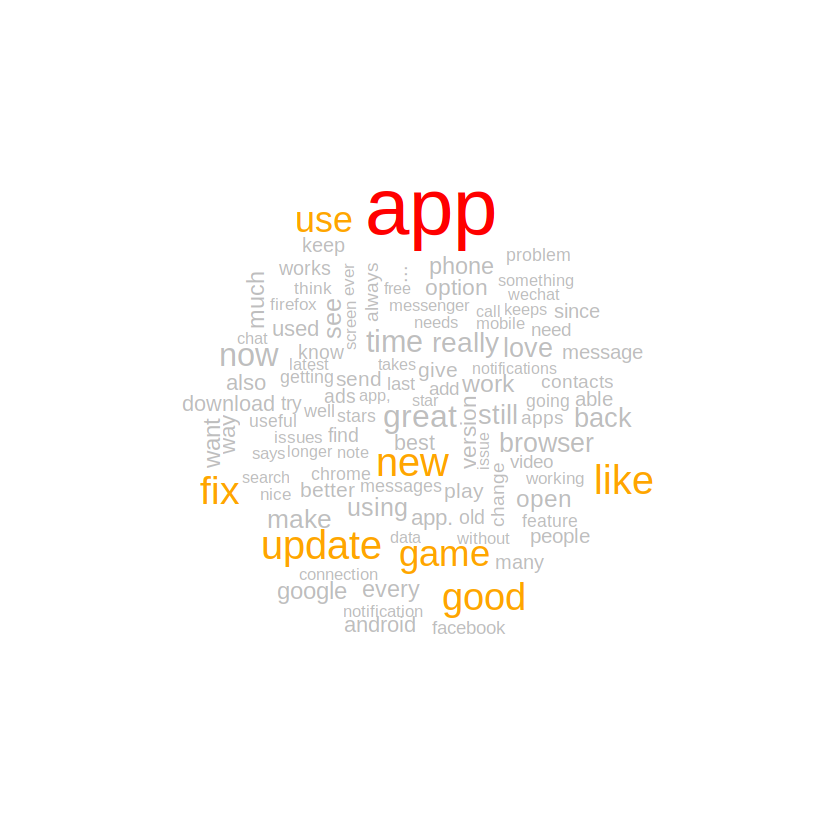

In [247]:
#Create a wordcloud with the most 100 frequent terms
wordcloud(tabla_frec$term, tabla_frec$freq, max.words = 100, colors = c( "grey", "orange", "red"))

Separación de conjuntos de entrenamiento y test con variable Polaridad:

In [248]:
set.seed(555)

# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = df_sentiment$polarity
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data.train<-df_sentiment[inTrain,]
data.test<-df_sentiment[-inTrain,]
# Revisamos el split
str(data.train)
str(data.test)

'data.frame':	624 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " the new features suck for those of us who don't have a working back button can you guys make the videos able t"| __truncated__ ...
 $ polarity    : Factor w/ 2 levels "NegativePositive",..: 2 2 2 2 2 2 2 2 2 2 ...
'data.frame':	267 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " forced reload on uploading pic on replying 

In [249]:
# Separamos el corpus según la clase
corpus.train = data_corpus_clean[inTrain]
corpus.test  = data_corpus_clean[-inTrain]

# Y finalmente el Document term matrix
dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data.train$polarity))*100, 2)
print("Test")
round(prop.table(table(data.test$polarity))*100, 2)

[1] "Training"



NegativePositive          Neutral 
           34.46            65.54 

[1] "Test"



NegativePositive          Neutral 
           34.46            65.54 

65.54 para training and test correspondiente a polaridad neutral y 34.46 para ambos correspondiente a polaridad muy Negativo/Positivo.

Encontramos términos frecuentes en una matriz documento-término o término-documento:

In [250]:
freq_terms = findFreqTerms(dtm.train, 3)
freq_terms

[1] "!!!"                          "..."                         
  [3] "...."                         "....."                       
  [5] "2015"                         "ă\u0080\u008b"               
  [7] "aap"                          "ability"                     
  [9] "able"                         "absolutely"                  
 [11] "access"                       "account"                     
 [13] "accounts"                     "across"                      
 [15] "action"                       "active"                      
 [17] "actually"                     "add"                         
 [19] "added"                        "addictive"                   
 [21] "adding"                       "address"                     
 [23] "adds"                         "ads"                         
 [25] "ads."                         "ago"                         
 [27] "ain't"                        "allow"                       
 [29] "allows"                       "almost"                      
 [31] "along"                        "already"                     
 [33] "also"                         "also,"                       
 [35] "also."                        "although"                    
 [37] "always"                       "amazing"                     
 [39] "amazing,"                     "among"                       
 [41] "amount"                       "android"                     
 [43] "android."                     "angry"                       
 [45] "annoying"                     "annoying."                   
 [47] "another"                      "anymore"                     
 [49] "anymore."                     "anyone"                      
 [51] "anything"                     "anything."                   
 [53] "app"                          "app,"                        
 [55] "app!"                         "app."                        
 [57] "app.."                        "appear"                      
 [59] "appears"                      "apple"                       
 [61] "application"                  "apps"                        
 [63] "apps."                        "around"                      
 [65] "asked"                        "asking"                      
 [67] "asks"                         "asus"                        
 [69] "attack"                       "attractive"                  
 [71] "auto"                         "automatically"               
 [73] "available"                    "average"                     
 [75] "away"                         "away."                       
 [77] "awesome"                      "awesome,"                    
 [79] "awful."                       "awsome"                      
 [81] "back"                         "back."                       
 [83] "backed"                       "background"                  
 [85] "bad"                          "bar"                         
 [87] "bar,"                         "base"                        
 [89] "basically"                    "battery"                     
 [91] "become"                       "becomes"                     
 [93] "begin"                        "best"                        
 [95] "better"                       "better,"                     
 [97] "better."                      "big"                         
 [99] "bird"                         "birds"                       
[101] "bit"                          "black"                       
[103] "bolt"                         "book"                        
[105] "bookmark"                     "bookmarks"                   
[107] "bottom"                       "box"                         
[109] "break"                        "brilliant"                   
[111] "browser"                      "browser,"                    
[113] "browser."                     "browsers"                    
[115] "browsers."                    "browsing"                    
[117] "bug"                          "bugs"               

In [251]:
freq_terms = findFreqTerms(dtm.train, 3)
reduced_dtm.train = DocumentTermMatrix(corpus.train, list(dictionary=freq_terms))
reduced_dtm.test =  DocumentTermMatrix(corpus.test, list(dictionary=freq_terms))

#REvisamos cuantas columnas reducimos
ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 5598

[1] 993

[1] 5598

[1] 993

Se redujo un 82,37% en columnas en ambos datasets.

## <font color='#3d59c6'>  CLASIFICADOR NAIVE BAYES </font>

In [182]:
inspect (reduced_dtm.train)

<<DocumentTermMatrix (documents: 624, terms: 993)>>
Non-/sparse entries: 8256/611376
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  app fix game good great like new now update use
  2     3   0    0    0     0    0   0   0      0   0
  200   0   2    3    0     0    0   2   0      1   0
  321   1   0    0    0     0    1   0   0      0   0
  461   0   0    0    0     0    1   0   1      1   0
  591   0   0    0    0     0    1   0   0      0   1
  603   1   0    0    0     0    0   0   0      0   1
  631   0   1    0    0     0    1   0   1      0   0
  664   7   0    0    1     1    0   1   0      1   0
  707   0   1    0    1     0    0   0   1      1   0
  809   0   0    0    2     0    2   0   0      0   1


In [252]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("Neutral", "Negative/Positive"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

In [253]:
# store our model in sms_classifier
subject_classifier = naiveBayes(reduced_dtm.train # Dataset de entrenamiento
                            , data.train$polarity) # Target de entrenamiento

subject_test.predicted = predict(subject_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm.test) # Generación de predicciones para el dataset de test

# Ahora sacamos el confusion matrix
confusionMatrix(subject_test.predicted, data.test$polarity)

Confusion Matrix and Statistics

                  Reference
Prediction         NegativePositive Neutral
  NegativePositive               67      24
  Neutral                        25     151
                                          
               Accuracy : 0.8165          
                 95% CI : (0.7647, 0.861) 
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 4.356e-09       
                                          
                  Kappa : 0.5926          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7283          
            Specificity : 0.8629          
         Pos Pred Value : 0.7363          
         Neg Pred Value : 0.8580          
             Prevalence : 0.3446          
         Detection Rate : 0.2509          
   Detection Prevalence : 0.3408          
      Balanced Accuracy : 0.7956          
                                 

A simple vista la precisión del modelo parece regular con un 81% de accuracy. Verificaremos las instancias:

In [187]:
data.test[(subject_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == 'NegativePositive'),] # Seleccionamos las instancias con etiqueta 1 - Negative/Positive

,package_name,review,polarity
,<chr>,<chr>,<fct>
224,com.supercell.clashofclans,"know how to get the account back. you have to delete clash of clans,then you download it again, then you look on the upper left corner of the screen, then you see already have a village?'' then you press it,then you will have your village.",NegativePositive
263,com.android.chrome,"the best i agree totally with the last poster. chrome is simply the best for android period. i've tried all the other crap out there and yeah they have some more features none of which i ever used. i have chrome on my laptop and pc and all of this is synced together. simple, direct and to the point and that's what i like and don't forget very fast.",NegativePositive
264,com.android.chrome,good... chrome is improving...! but there are some problems 1)we can't change the default download location. 2)app size is high. 3)can't save web pages for offline viewing. 4)can't stop loading web pages easily.,NegativePositive
351,com.viber.voip,viber s.a.r.l. this app helps me to stay in contact while also having video options and picture options. really nice app and pretty stable running. just a few video and audio issues as well as video and call drops which can be annoying. sometimes the app is unstable but is mostly attributed to network issues rather than the app itself. i recommend this app.,NegativePositive
362,com.google.android.talk,"it's great when it works but right now it won't download any mms. it just says they're there and won't download them, and then loses the message when i switch to a different app to try to download it instead.",NegativePositive
403,com.facebook.orca,"does what it says it does, but chat heads have limitations. the issue i have almost everyday is that when a conversation is open in a chat head, you can not paste what is copied to your clipboard. everything is works fine enough.",NegativePositive
438,com.whatsapp,"a avid fan of wapp; thats what we call it.. a recommendation.. if u guys can include a feature in which i can stay offline even when the internet connectivity is on.. right now if the internet is on, i keep getting msgs even though i want to stay offline n receive no msgs... please work on this.. rest u people rock đ",NegativePositive
441,com.whatsapp,occasionally i won't receive a notification of a message(s) so i don't know that someone has replied until i actually open the app and then suddenly lots of messages come through... 5 stars if that can be fixed,NegativePositive
455,com.whatsapp,"good its very good to use . but i found some fualts . while writing lengthy status ,the words which we enter at starting will not be visible. so to edit those words we should slide through the text we have written . so make status editing line step by step instead a single line.",NegativePositive


In [256]:
data.test[(subject_test.predicted != data.test$polarity) # Seleccionamos las instancias con error en la predicción
          & (data.test$polarity == 'Neutral'),] # Seleccionamos las instancias con etiqueta 0 - Neutral

,package_name,review,polarity
,<chr>,<chr>,<fct>
50,com.twitter.android,"the new update sucks i hate that they switched favorite to like , i love twitter so much but it's turning into facebook real fast, i previously rated it 5 stars but right now i'm rating it 1 star due to te next update, i'll rate it 5 again once the change is made, until then, if you want a second facebook experience feel free to download.",Neutral
107,com.linkedin.android,"why can't i share my achievements? recently discovered that there is a feature for sharing any kind of achievement, however i can't accomplish it on my profile",Neutral
159,com.king.candycrushsaga,what the hell!! stole all my boosters! all my boosters and power ups are gone.. return it now.. had more than 60 of each! what a cheap manner to manage the game!! return all power ups nowww!!!!,Neutral
166,com.imangi.templerun2,awesome its nice but not compatible with my handset gionee p2s if u can make it compatible i would be happy but don't woory i have i phone in march 2016 then i will play till then wish you all happy new year and hats off to this game,Neutral
180,com.imangi.templerun2,temple run -pretty good the game is fun.but i would like it if it didn't have so many videos for one specific app most of the time. it would also be nice if you could choose to be a boy or a girl character. overall the game is okay/pretty good,Neutral
193,com.imangi.templerun2,"always fun, but... i like this new frozen shadows, but the depth perception is not so good. it's hard to see an approaching corner. other then that small bug, i love this game and will continue to play it.",Neutral
198,com.imangi.templerun2,"would give 5* if i could retrieve my previous game my phone crashed and i had to install it again, didn't get to keep my score, coins and boosts, the gems i paid for where also lost, negatives aside, i enjoy this game, its a good time waster, i thinks it's better than the first temple run.",Neutral
272,com.android.chrome,average not so good for watching online videos for watching videos i would prefer stock aosp google browser or uc browser + mx player.,Neutral
278,com.android.chrome,"translation use it for browsing and visiting viet and chinese and other country sites for translations, but using uc browser for downloading.. no other app can replace uc for fast downloading speed..",Neutral


In [257]:
round(prop.table(table(subject_test.predicted))*100, digits = 1)

subject_test.predicted
NegativePositive          Neutral 
            34.1             65.9 

Tenemos un 65.9% de los reviews predecidos como neutral y un 34.1 como muy Negativo/Positivo.

Las palabras que no están presentes en los datos de entrenamiento se denominan palabras fuera de vocabulario (OOV). No se puede aplicar Laplace a palabras que no están en el vocabulario. Aplicamos Laplace a las palabras que están en el vocabulario. Esto se debe a que algunas palabras de vocabulario que aparecen en una clase pueden no aparecer en las otras por lo que las probabilidades máximas de esa palabara se convertirían en 0. Por lo tanto, aplicamos el smoothing de Laplace para dar cierta masa de probabilidad a las palabras de nuestro vocabulario que pueden no haberse visto en un comentario positivonegativo, pero sí en un comentario neutral.

In [258]:
# Hacemos una iteración para nuestro modelo en base a un factor i, siendo i el factor alpha en el laplace smoothing
for (i in (1:10))
{
    print(paste0("Laplace factor of ", as.character((i-1)/4)))
    sms_classifier2 = naiveBayes(reduced_dtm.train, 
                                 data.train$polarity,
                                 laplace = (i-1)/4)
    
    sms_test.predicted2 = predict(sms_classifier2,
                                  reduced_dtm.test)
    
    print(confusionMatrix(sms_test.predicted2, data.test$polarity))
}

[1] "Laplace factor of 0"
Confusion Matrix and Statistics

                  Reference
Prediction         NegativePositive Neutral
  NegativePositive               67      24
  Neutral                        25     151
                                          
               Accuracy : 0.8165          
                 95% CI : (0.7647, 0.861) 
    No Information Rate : 0.6554          
    P-Value [Acc > NIR] : 4.356e-09       
                                          
                  Kappa : 0.5926          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.7283          
            Specificity : 0.8629          
         Pos Pred Value : 0.7363          
         Neg Pred Value : 0.8580          
             Prevalence : 0.3446          
         Detection Rate : 0.2509          
   Detection Prevalence : 0.3408          
      Balanced Accuracy : 0.7956          
       

Con Laplace factor 0, nos arroja un mayor nivel de accuracy. Ésta va disminuyendo a medida que aumenta el factor = 1.

## Predicción con variable Package

Se incorpora variable package_name para realizar predicción de reviews en base a las aplicaciones y no a su polaridad. No encuentro mucho sentido aplicando esta variable, o no entiendo el enunciado. Pero veremos que dicen los cálculos.


In [261]:
set.seed(555)

# Creamos el data partition de la función caret con un 70 - 30 split
inTrain <- createDataPartition(y = df_sentiment$package_name
                                  , p = .70
                                  , list = FALSE
                                  , times = 1)
# Definitmos los datasets originales entre train y test
data.train<-df_sentiment[inTrain,]
data.test<-df_sentiment[-inTrain,]
# Revisamos el split
str(data.train)
str(data.test)

'data.frame':	630 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " privacy at least put some option appear offline. i mean for some people like me it's a big pressure to be seen"| __truncated__ " messenger issues ever since the last update, initial received messages don't get pushed to the messenger app a"| __truncated__ " profile any time my wife or anybody has more than one post and i view them it would take me to there profile s"| __truncated__ " forced reload on uploading pic on replying comment last night i tried to reply a comment by uploading a photo "| __truncated__ ...
 $ polarity    : Factor w/ 2 levels "NegativePositive",..: 2 2 2 2 2 2 2 2 2 2 ...
'data.frame':	261 obs. of  3 variables:
 $ package_name: chr  "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" "com.facebook.katana" ...
 $ review      : chr  " the new features suck for those of us who d

In [262]:
# Separamos el corpus según la clase
corpus.train = data_corpus_clean[inTrain]
corpus.test  = data_corpus_clean[-inTrain]

# Y finalmente el Document term matrix
dtm.train = dtm[inTrain, ]
dtm.test  = dtm[-inTrain, ]

# Comprobamos que el desbalanceo de clases es el adecuado
print("Training")
round(prop.table(table(data.train$package_name))*100, 2)
print("Test")
round(prop.table(table(data.test$package_name))*100, 2)

[1] "Training"



        com.android.chrome        com.dropbox.android 
                      4.44                       4.44 
              com.evernote        com.facebook.katana 
                      4.44                       4.44 
         com.facebook.orca    com.google.android.talk 
                      4.44                       4.44 
         com.hamrokeyboard             com.hamropatro 
                      4.44                       4.29 
     com.imangi.templerun2    com.king.candycrushsaga 
                      4.44                       4.44 
      com.linkedin.android      com.opera.mini.native 
                      4.44                       4.44 
      com.rovio.angrybirds    com.shirantech.kantipur 
                      4.44                       4.13 
                 com.Slack com.supercell.clashofclans 
                      4.44                       4.44 
            com.tencent.mm        com.twitter.android 
                      4.44                       4.44 
         

[1] "Test"



        com.android.chrome        com.dropbox.android 
                      4.21                       4.60 
              com.evernote        com.facebook.katana 
                      4.60                       4.60 
         com.facebook.orca    com.google.android.talk 
                      4.60                       4.21 
         com.hamrokeyboard             com.hamropatro 
                      4.21                       4.21 
     com.imangi.templerun2    com.king.candycrushsaga 
                      4.60                       4.60 
      com.linkedin.android      com.opera.mini.native 
                      4.60                       4.60 
      com.rovio.angrybirds    com.shirantech.kantipur 
                      4.21                       3.83 
                 com.Slack com.supercell.clashofclans 
                      4.60                       4.60 
            com.tencent.mm        com.twitter.android 
                      4.21                       4.21 
         

Valores entre 2 y 4.60 para las ditintas apps. Aparentemente bien balanceadas.

In [263]:
freq_terms = findFreqTerms(dtm.train, 3)
freq_terms

[1] "!!!"                          "..."                         
   [3] "...."                         "....."                       
   [5] "......."                      "'ll"                         
   [7] "'share"                       "2015"                        
   [9] "aap"                          "ability"                     
  [11] "able"                         "access"                      
  [13] "account"                      "accounts"                    
  [15] "across"                       "action"                      
  [17] "active"                       "actually"                    
  [19] "add"                          "added"                       
  [21] "addictive"                    "adding"                      
  [23] "address"                      "adds"                        
  [25] "ads"                          "ads."                        
  [27] "advertisement"                "ago"                         
  [29] "agree"                        "allow"                       
  [31] "allows"                       "almost"                      
  [33] "along"                        "already"                     
  [35] "also"                         "also,"                       
  [37] "also."                        "always"                      
  [39] "amazing"                      "amount"                      
  [41] "android"                      "android."                    
  [43] "angry"                        "annoying"                    
  [45] "annoying."                    "another"                     
  [47] "answer"                       "anymore"                     
  [49] "anymore."                     "anyone"                      
  [51] "anything"                     "app"                         
  [53] "app,"                         "app!"                        
  [55] "app?"                         "app."                        
  [57] "app..."                       "appear"                      
  [59] "appears"                      "apple"                       
  [61] "application"                  "apps"                        
  [63] "apps."                        "around"                      
  [65] "asking"                       "auto"                        
  [67] "automatically"                "available"                   
  [69] "available."                   "average"                     
  [71] "away"                         "away."                       
  [73] "awesome"                      "awesome."                    
  [75] "awful."                       "back"                        
  [77] "back."                        "background"                  
  [79] "bad"                          "bait"                        
  [81] "bar"                          "base"                        
  [83] "based"                        "bases"                       
  [85] "battery"                      "become"                      
  [87] "becomes"                      "begin"                       
  [89] "best"                         "beta"                        
  [91] "better"                       "better."                     
  [93] "big"                          "birds"                       
  [95] "bit"                          "black"                       
  [97] "block"                        "book"                        
  [99] "bookmark"                     "bookmarks"                   
 [101] "boosters"                     "boosters."                   
 [103] "box"                          "brilliant"                   
 [105] "browser"                      "browser,"                    
 [107] "browser."                     "browsers"                    
 [109] "browsing"                     "bug"                         
 [111] "bugs"                         "busy"                        
 [113] "button"                       "button."                     
 [115] "buy"                          "buying"                      
 

In [264]:
freq_terms = findFreqTerms(dtm.train, 3)
reduced_dtm.train = DocumentTermMatrix(corpus.train, list(dictionary=freq_terms))
reduced_dtm.test =  DocumentTermMatrix(corpus.test, list(dictionary=freq_terms))

#REvisamos cuantas columnas reducimos
ncol(dtm.train)
ncol(reduced_dtm.train)
ncol(dtm.test)
ncol(reduced_dtm.test)

[1] 5598

[1] 1010

[1] 5598

[1] 1010

Se redujo un 82% en columnas en ambos datasets.

## <font color='#3d59c6'>  CLASIFICADOR NAIVE BAYES </font>

In [265]:
inspect (reduced_dtm.train)

<<DocumentTermMatrix (documents: 630, terms: 1010)>>
Non-/sparse entries: 8451/627849
Sparsity           : 99%
Maximal term length: 18
Weighting          : term frequency (tf)
Sample             :
     Terms
Docs  app fix game good like new now time update use
  200   0   2    3    0    0   2   0    1      1   0
  5     1   1    0    0    0   0   0    0      0   0
  531   0   0    0    0    0   0   0    0      0   0
  603   1   0    0    0    0   0   0    1      0   1
  631   0   1    0    0    1   0   1    0      0   0
  681   1   0    0    1    1   0   0    0      0   1
  732   0   0    0    2    0   0   0    1      1   0
  746   1   1    0    0    0   0   0    0      0   0
  791   2   2    0    0    0   1   0    0      0   0
  873   1   0    6    1    0   0   0    1      0   0


In [266]:
convert_counts = function(x) {
  x = ifelse(x > 0, 1, 0)
  x = factor(x, levels = c(0, 1), labels=c("Neutral", "Negative/Positive"))
  return (x)
}

# apply() allows us to work either with rows or columns of a matrix.
# MARGIN = 1 is for rows, and 2 for columns
reduced_dtm.train = apply(reduced_dtm.train, MARGIN=2, convert_counts)
reduced_dtm.test  = apply(reduced_dtm.test, MARGIN=2, convert_counts)

In [267]:
# store our model in sms_classifier
subject_classifier = naiveBayes(reduced_dtm.train # Dataset de entrenamiento
                            , data.train$package_name) # Target de entrenamiento

subject_test.predicted = predict(subject_classifier,  # Predicciones utilizando el modelo creado con los datos de entrenamiento
                             reduced_dtm.test) # Generación de predicciones para el dataset de test

# Ahora sacamos el confusion matrix
confusionMatrix(subject_test.predicted, as.factor(data.test$package_name))

Confusion Matrix and Statistics

                            Reference
Prediction                   com.android.chrome com.dropbox.android
  com.android.chrome                          3                   1
  com.dropbox.android                         0                   4
  com.evernote                                0                   1
  com.facebook.katana                         0                   0
  com.facebook.orca                           0                   0
  com.google.android.talk                     0                   1
  com.hamrokeyboard                           1                   0
  com.hamropatro                              0                   1
  com.imangi.templerun2                       0                   0
  com.king.candycrushsaga                     1                   0
  com.linkedin.android                        0                   1
  com.opera.mini.native                       2                   0
  com.rovio.angrybirds                       

En la fase de preprocesamiento fui descartando varias palabras no relevantes con la función: stopwords("en"), "shall","will", "let","thou", "thy", "shall", "thee", "will", "o", "just", "please", "can", "get", "one", "even")). Donde fui incorporando las que no sumaban a encontrar un sentido sobre si una review fue negativa-positiva o neutral. Creo que es básico realizar una buena limpieza para obtener mejores resultados del modelo.

Se ejecuta también Laplace pero la accuracy no mejora usando valores alfa más altos, lo que sí, empuja la probabilidad hacia un valor de 0,5, es decir, la probabilidad de una palabra igual a 0,5 para las críticas positivas/negativas y/o neutras. Dado que no estamos obteniendo mucha información de eso, no es preferible. Por lo tanto, se prefiere usar alfa=0, con un accuracy del 81%, con un balance de accuracy de 79%.

El modelo no mejora usando la variable categórica package_name teniendo un Accuracy del 38%.  Lo que no se si esto estaría bien aplicado sin tener la orientación del sentimiento y sólo los datos de las apps con reviews.

Lo que me sorprendió de este trabajo, es que una de las mayores ventajas que Naive Bayes tiene sobre otros algoritmos de clasificación es la capacidad de manejo de un número extremadamente grande de características. En este caso, cada palabra es tratada como una característica y hay miles de palabras diferentes. Otra ventaja importante es que el modelo de entrenamiento y procesos de predicción son muy rápidos teniendo en cuenta la cantidad de datos que puede manejar.